<h2>Renae Kelly  41660439</h2>
<h1>Analysing a stellar model and comparing it with a solar model<h1>

 <h4>Introduction</h4> Using MESA to analyse stellar models
Modules for Experiments in Stellar Astrophysics (MESA) solves the stellar equations for given stellar models that you can input the parameters for. It outputs a history file which gives you information about the evolution of the star over time as well as profiles which are snapshots of the star at a given time with data privided as a function of the radius. Although each solution of the stellar equations is a static solution, the programe varies likey attributes that change over time, to allow you to see the evolution of the star.

In [3]:
#This cell just needs running.

import mesa_reader as ms
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as P
import matplotlib.pyplot as pl
#pl.plot(range(10))

from IPython.core.pylabtools import figsize, getfigs


import os
import sys 


<h3> Stellar Model at 2 times solar mass and 0.001 metalicity </h3>
Plots of a solar model as well as the stellar model created

In [4]:
# Assuming you launched jupyter-notebook from the directory containing LOGS, then the following lines are OK.
logs_folder = './'
# tracks becomes the object containing all track info
tracks = ms.MesaData(logs_folder+'LOGS-mymodel/history.data')
# Here are some ways to read the profiles: If you know exactly what profile file you want:
profile_1 = ms.MesaData(logs_folder+'LOGS-mymodel/profile1.data')
# An equivalent way to read a given profile file:
profile_20 = ms.MesaLogDir('./LOGS-mymodel').profile_data(profile_number=20)
# Here is if you know the model nummber but not the profile number. There must be a profile file for that model number.
profile_1150 = ms.MesaLogDir('./LOGS-mymodel').profile_data(model_number=1150) 

Text(3.75,0.5,'DoE')

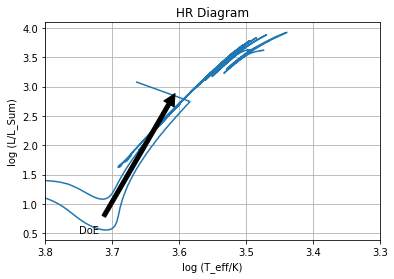

In [5]:
# Here we load the data for the surface temperature and luminosity as a function of time...

logTeff=tracks.data('log_Teff')
logL=tracks.data('log_L')

# Or you can also do exactly the same with:
# logTeff = tracks.log_Teff
# logL = tracks.log_L

# ... then we plot temperature and luminosity (this is a diagram we will use a lot)

fig=P.figure().add_subplot(111)
fig.set_xlim(3.8,3.3)
P.plot(logTeff,logL)

P.ylabel('log (L/L_Sum)')
P.xlabel('log (T_eff/K)')
P.title('HR Diagram')
P.grid(True)


fig.annotate('DoE', xy=(3.6, 3.0), xytext=(3.75, 0.5), 
             arrowprops=dict(facecolor='black', shrink=0.05),)

This is the HR diagram of my model with 2 times mass of the sun and very low metalicity



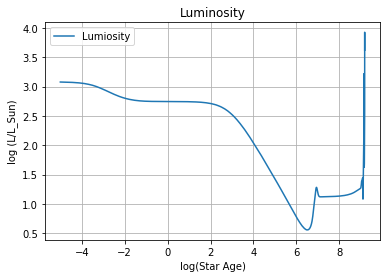

In [6]:
# Stellar luminosity vs. time...

logL=tracks.data('log_L')
age=tracks.data('star_age')

fig=P.figure().add_subplot(111)

P.plot(np.log10(age),logL, label = 'Lumiosity')

P.ylabel('log (L/L_Sun)')
P.xlabel('log(Star Age)')
P.title('Luminosity')
P.grid(True)
P.legend(loc = 'best')

In [7]:
# If you need to compare two runs, for example for two stars with different mass, you can read
# a second hisoty.data file from another directory:

#logs_folder_2 = 'OtherModel'
#tracks_2 = ms.MesaData(logs_folder_2+'LOGS')
logs_folder_2 = './'
tracks_sun = ms.MesaData(logs_folder_2+'LOGS-Sun/history.data')

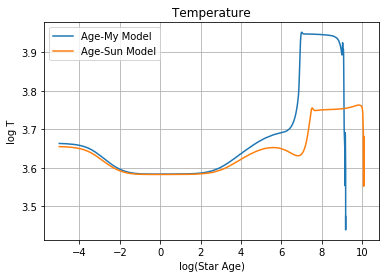

In [8]:
#log_Teff=tracks.data('log_Teff')                       original code for one plot, kept for reference
#age=tracks.data('star_age')
#radius=tracks.data('log_R')

#fig=P.figure().add_subplot(111)


#P.plot(np.log10(age),log_Teff, label = 'age')

#P.ylabel('log T')
#P.xlabel('log(Star Age)')
#P.title('Temperature')
#P.grid(True)
#P.legend(loc = 'best')

log_Teff=tracks.data('log_Teff')
age=tracks.data('star_age')
radius=tracks.data('log_R')

fig=P.figure().add_subplot(111)                         #changed to plot both models on the same graph


fig.plot(np.log10(age),log_Teff, label = 'Age-My Model')

P.ylabel('log T')
P.xlabel('log(Star Age)')
P.title('Temperature')
P.grid(True)
P.legend(loc = 'best')

log_Teff=tracks_sun.data('log_Teff')
age_sun=tracks_sun.data('star_age')
radius_sun=tracks_sun.data('log_R')

fig.plot(np.log10(age_sun),log_Teff, label = 'Age-Sun Model')

P.ylabel('log T')
P.xlabel('log(Star Age)')
P.title('Temperature')
P.grid(True)
P.legend(loc = 'best')

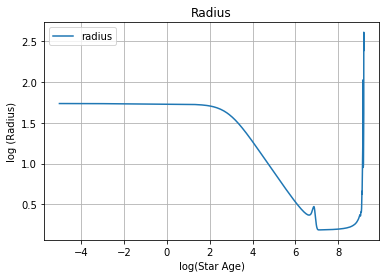

In [9]:
# Plotting Radius of my model

fig=P.figure().add_subplot(111)
P.plot(np.log10(age),radius, label = 'radius')
P.ylabel('log (Radius)')
P.xlabel('log(Star Age)')
P.title('Radius')
P.grid(True)
P.legend(loc = 'best')

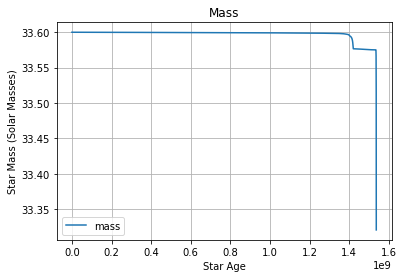

In [10]:
# Plotting Mass of my model

star_mass=tracks.log_xmstar
age=tracks.star_age
P.plot(age,star_mass, label = 'mass')
P.ylabel('Star Mass (Solar Masses)')
P.xlabel('Star Age')
P.title('Mass')
P.grid(True)
P.legend(loc = 'best')


In [11]:
10**(33.5997)        #checking correct column names in my_model history, changed star mass to log_xmstar


3.978322628232945e+33

In [12]:
## Using profile 1
gas_density_1 = profile_1.logRho
radius_1 = 10 ** profile_1.logR

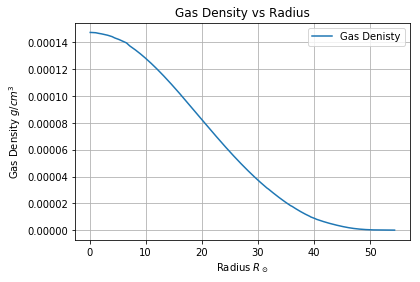

In [13]:
# Plotting the gas density as a function of radius

P.plot(radius_1,10**gas_density_1, label = 'Gas Denisty')
P.ylabel('Gas Density $g/cm^3$')
P.xlabel('Radius $R_\odot$')
P.title('Gas Density vs Radius')
P.grid(True)
P.legend(loc = 'best')

We can see that the gas is more dense in the core of the star and the surface of the star has a low density.

In [14]:
# If you want to determine at what model number a certain characteristics takes place, for excample at what
# model number the star has a certain size then you fiurst read the model numbers:

model_number = tracks.data('model_number')

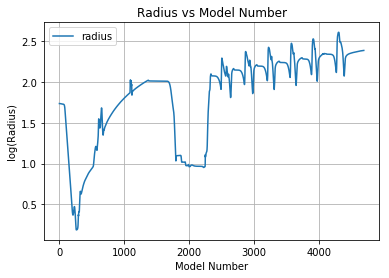

In [15]:
# ... then you plot that quantity (radius) vs. model number:
P.plot(model_number,radius, label = 'radius')
P.ylabel('log(Radius)')
P.xlabel('Model Number')
P.title('Radius vs Model Number')
P.grid(True)
P.legend(loc = 'best')

In [16]:
tracks.data_at_model_number('log_R', 300)       #Checking if model number 300 is appropriately small for comparison, using
                                                #profiles.index in LOGS this gave a corresponding profile of 9

0.40960063548576975

In [17]:
tracks.data_at_model_number('log_R', 1200)      #Checking if model number 300 is appropriately large for comparison, using
                                                #profiles.index in LOGS this gave a corresponding profile of 28 

1.9336223026197954

In [30]:
#pressure_83 = profile_83.get('pressure')        keeping initial code for reference
#radius_83 = profile_83.get('radius')
#mass_83 = profile_83.get('mass')
#density_83 = profile_83.get('logRho')
profile_9 = ms.MesaData(logs_folder+'LOGS-mymodel/profile9.data')           #assigning the data from a profile with small radius
pressure_9 = profile_9.logP
radius_9 = profile_9.logR
mass_9 = profile_9.mass
density_9 = profile_9.logRho                                            

In [31]:
#pressure gradiant
pgrad = np.gradient(pressure_9)/np.gradient(radius_9*6.96e10)  #converting to cm from solar radii

In [34]:
G = 6.67810e-8 #in cgs units

mass = mass_9*(1.9891e33)
radius = radius_9*(6.96e10)

#force of gravity
grav = (-G*mass*(10**density_9))/(radius**2.)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


In [27]:
10**0.4

2.51188643150958

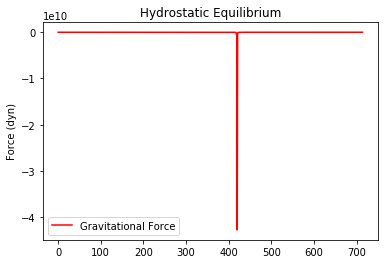

In [29]:
fig=P.figure().add_subplot(111)
#fig.set_xlim(1000,1600)
P.plot(pgrad,'g', label = 'Pressure Gradiant')
P.plot(grav,'r', label = 'Gravitational Force')
P.title('Hydrostatic Equilibrium')
P.ylabel('Force (dyn)')
P.legend(loc = 'best')

The pressure gradiant in the star correlates very nicely with the calculated force of gravity. So we can conclude that the star is indeed in hydrostatic equilibrium.

In [20]:
profile_giant = ms.mesa_profile(logs_folder+'LOGS',14000,num_type='nearest_model') #profile whilst the star is in giant phase
profile_solar = ms.mesa_profile(logs_folder+'LOGS',2000,num_type='nearest_model') #profile whilst the star is at 1 solar radius.

100 in profiles.index file ...
Found and load nearest profile for cycle 14000
reading /home/abatten/mesa_sun/LOGS/profile2.data ...
100 in profiles.index file ...
Found and load nearest profile for cycle 2000
reading /home/abatten/mesa_sun/LOGS/profile43.data ...


<h3> Giant Star vs Solar Sized Star </h3>
THe following is a comparison between the giant phase of a star and a solar sized star.

In [21]:
density_giant = profile_giant.get('logRho')
density_solar = profile_solar.get('logRho')

radius_giant = profile_giant.get('radius')
radius_solar = profile_solar.get('radius')


radius_giant = radius_giant*(6.96e10)
radius_solar = radius_solar*(6.96e10)

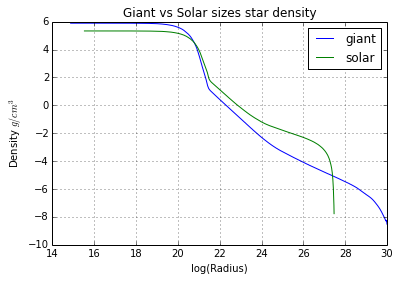

In [81]:
fig=P.figure().add_subplot(111)

P.plot(np.log(radius_giant),density_giant,label = 'giant')
P.plot(np.log(radius_solar),density_solar ,label = 'solar')
P.ylabel('Density $g/cm^3$')
P.xlabel('log(Radius)')
P.title('Giant vs Solar sizes star density')
P.grid(True)


P.legend(loc = 'best')

The density of the gas near the core of a giant star in much larger than a solar sized star. However furtherout from the core the solar sized star has a higher density.

In [24]:
tracks_2 = ms.history_data('LOGS-2Mo')

Clean history.data to make new history.datasa? (y/n)y
No history.datasa file found, create new one from history.data
Closing history.data  tool ...


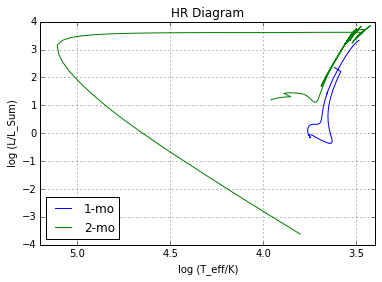

In [25]:
logTeff2Mo=tracks_2.get('log_Teff')
logL2Mo=tracks_2.get('log_L')

fig=P.figure().add_subplot(111)
fig.set_xlim(5.2,3.4)
P.plot(logTeff,logL, label = '1-mo')
P.plot(logTeff2Mo,logL2Mo, label = '2-mo')

P.ylabel('log (L/L_Sum)')
P.xlabel('log (T_eff/K)')
P.title('HR Diagram')
P.grid(True)
P.legend(loc='best')

1-Mo Star:
The model shows the contraction phase and the star moving along the main sequence and up to the RGB, however it stops as it gets to the top RGB.


2-Mo Star:
The thicker lines on the left is the star pulsating along the Hyashi track. It then turns left as as the envolope of the star collapses, causing the star to appear hotter before colling along the white dwarf track.

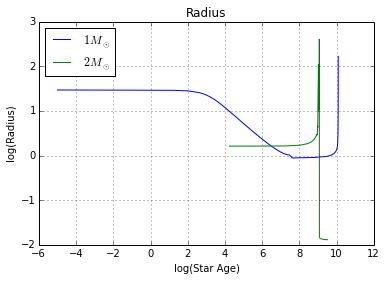

In [110]:
radius2Mo=tracks_2.get('log_R')
age2Mo=tracks_2.get('star_age')

radius1Mo=tracks_1.get('log_R')
age1Mo=tracks_1.get('star_age')

fig=P.figure().add_subplot(111)
#fig.set_xlim(5.2,3.4)
P.plot(np.log10(age1Mo),radius1Mo, label = '$1M_\odot$')
P.plot(np.log10(age2Mo),radius2Mo, label = '$2M_\odot$')


P.ylabel('log(Radius) ')
P.xlabel('log(Star Age)')
P.title('Radius')
P.grid(True)
P.legend(loc='best')

Zooming in on the 2-Mo star at around log(Star Age) = 9 i.e. 100 million years.